
--- Preparação dos Dados ---
Shape das características (X): (500, 2) (Número de amostras, Número de características)
Shape dos rótulos (y): (500,) (Número de amostras)
Classes presentes nos rótulos (y): [0 1 2]
Distribuição das classes:
 0    228
1    100
2    172
Name: count, dtype: int64

--- Dados Após Divisão (Treino/Teste) ---
Shape de X_train (treino): (350, 2)
Shape de y_train (rótulos de treino): (350,)
Shape de X_test (teste): (150, 2)
Shape de y_test (rótulos de teste): (150,)

--- Treinando o Modelo Naive Bayes ---
Modelo treinado com sucesso!

--- Realizando Previsões ---
Primeiras 10 previsões: [2 2 2 1 1 0 0 2 0 2]
Probabilidades das primeiras 2 previsões (arredondadas):
 [[0.    0.106 0.894]
 [0.    0.01  0.99 ]]
Ordem das classes para probabilidades: [0 1 2]

Previsão para uma nova amostra [-1.5 -1.8]: Classe 0
Probabilidades para a nova amostra:
  Classe 0: 0.9685
  Classe 1: 0.0315
  Classe 2: 0.0000

--- Avaliação do Modelo ---
Acurácia do Modelo: 0.9133

Relatório 

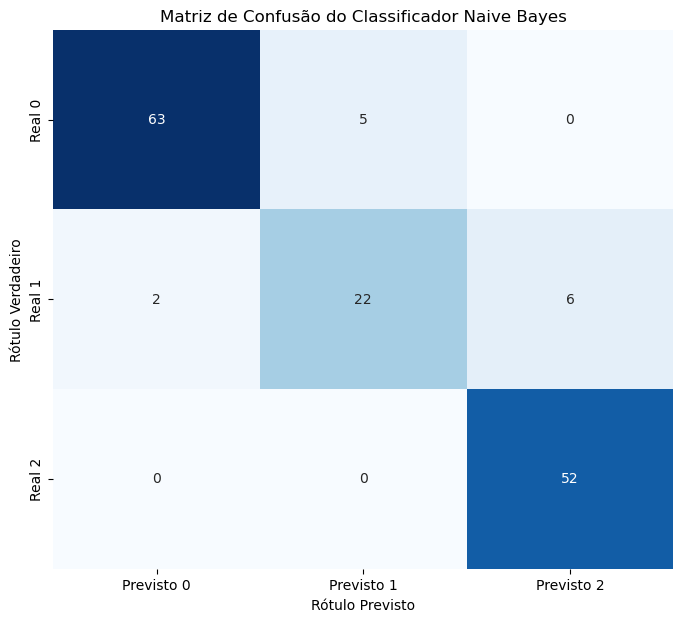

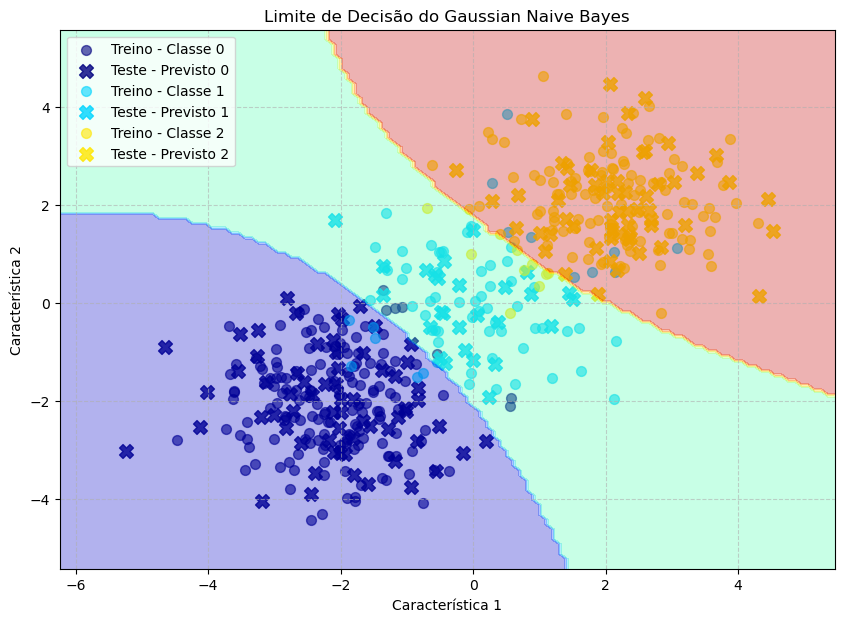

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Para dados numéricos contínuos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Informações Iniciais (Para sua adaptação) ---
# Antes de rodar, adapte estas variáveis ao seu problema:
NOME_DO_ARQUIVO_CSV = 'seus_dados.csv' # Substitua pelo caminho do seu arquivo de dados (se houver)
COLUNA_ALVO = 'sua_coluna_alvo'      # Substitua pelo nome da coluna que você quer prever (a classe)
# Se você tiver características categóricas, precisará de um pré-processamento extra (Ex: One-Hot Encoding).
# Se você tiver dados de texto, precisará de vetorização (Ex: CountVectorizer ou TfidfVectorizer) e MultinomialNB.

# --- 1. Preparação dos Dados ---

# Exemplo: Criando dados sintéticos genéricos para demonstração.
# EM SEU CASO: Substitua esta parte pelo carregamento e pré-processamento dos SEUS DADOS.

# 1.1. Carregar seus dados (Exemplo com dados sintéticos)
# Simula um dataset com 2 características numéricas (feature_1, feature_2) e 3 classes (0, 1, 2)
np.random.seed(42) # Para reprodutibilidade

num_samples = 500
X_data = np.random.randn(num_samples, 2) # Duas características aleatórias

# Criando 3 clusters distintos para as classes
y_data = np.zeros(num_samples, dtype=int)
y_data[np.random.rand(num_samples) < 0.33] = 1 # ~33% para classe 1
y_data[np.random.rand(num_samples) > 0.66] = 2 # ~33% para classe 2

# Ajustando as características para que as classes sejam um pouco separáveis
X_data[y_data == 0] += np.array([-2, -2])
X_data[y_data == 1] += np.array([0, 0])
X_data[y_data == 2] += np.array([2, 2])

# Criando um DataFrame (boa prática para visualizar dados)
df = pd.DataFrame(X_data, columns=['feature_1', 'feature_2'])
df['target_class'] = y_data

# --- EM SEU CASO, você faria algo como: ---
# try:
#     df = pd.read_csv(NOME_DO_ARQUIVO_CSV)
#     print(f"Dados carregados de {NOME_DO_ARQUIVO_CSV}. Primeiras 5 linhas:\n", df.head())
# except FileNotFoundError:
#     print(f"ERRO: Arquivo '{NOME_DO_ARQUIVO_CSV}' não encontrado. Criando dados sintéticos para demonstração.")
#     # Se o arquivo não for encontrado, o código continuará com os dados sintéticos acima.

# 1.2. Separar Características (X) e Rótulos (y)
# X são as colunas de entrada que o modelo usará para aprender.
# y é a coluna de saída que o modelo tentará prever (sua classe).
X = df.drop('target_class', axis=1).values # Remove a coluna alvo para X
y = df['target_class'].values           # Seleciona a coluna alvo para y

print("\n--- Preparação dos Dados ---")
print(f"Shape das características (X): {X.shape} (Número de amostras, Número de características)")
print(f"Shape dos rótulos (y): {y.shape} (Número de amostras)")
print("Classes presentes nos rótulos (y):", np.unique(y))
print("Distribuição das classes:\n", pd.Series(y).value_counts().sort_index())

# 1.3. Dividir os dados em conjuntos de Treino e Teste
# Dividimos os dados para que possamos treinar o modelo em uma parte
# e avaliar seu desempenho em dados "novos" (que ele não viu durante o treino).
# test_size: Proporção de dados para o conjunto de teste (ex: 0.3 = 30%).
# random_state: Garante que a divisão seja a mesma cada vez que você rodar o código (reprodutibilidade).
# stratify=y: MUITO IMPORTANTE! Garante que a proporção das classes seja mantida
#             tanto no conjunto de treino quanto no de teste. Essencial para classes desbalanceadas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\n--- Dados Após Divisão (Treino/Teste) ---")
print(f"Shape de X_train (treino): {X_train.shape}")
print(f"Shape de y_train (rótulos de treino): {y_train.shape}")
print(f"Shape de X_test (teste): {X_test.shape}")
print(f"Shape de y_test (rótulos de teste): {y_test.shape}")


# 2. Treinamento do Modelo (Fase de Aprendizado)

# 2.1. Escolher e Inicializar o Classificador Naive Bayes
# Existem diferentes tipos de Naive Bayes:
# - GaussianNB: Para características numéricas contínuas (como neste exemplo).
# - MultinomialNB: Para dados de contagem (comum em texto, ex: frequência de palavras).
# - BernoulliNB: Para dados binários (características são 0 ou 1).
# Adapte o tipo de NB aqui conforme suas características!

# Parâmetros:
# var_smoothing (apenas para GaussianNB): Um pequeno valor adicionado à variância
#   para evitar que seja zero. Ajuda a prevenir erros de cálculo e torna o modelo
#   mais robusto para dados com pouca variabilidade. O padrão 1e-9 é geralmente bom.
gnb = GaussianNB(var_smoothing=1e-9)

print("\n--- Treinando o Modelo Naive Bayes ---")
# 2.2. Treinar o Modelo
# O método .fit() é onde o algoritmo "aprende" com seus dados.
# Ele calcula todas as probabilidades a priori e condicionais a partir de X_train e y_train.
gnb.fit(X_train, y_train)
print("Modelo treinado com sucesso!")


# 3. Classificação de Novos Dados (Fase de Predição)

print("\n--- Realizando Previsões ---")
# 3.1. Fazer Previsões
# O método .predict() usa o modelo treinado para prever a classe dos novos dados (X_test).
# Ele retorna a classe mais provável para cada amostra.
y_pred = gnb.predict(X_test)
print(f"Primeiras 10 previsões: {y_pred[:10]}")

# 3.2. Obter Probabilidades (Opcional, mas muito útil!)
# O método .predict_proba() retorna a probabilidade de cada amostra pertencer a CADA UMA das classes.
# Útil para entender a confiança do modelo em suas previsões.
# As colunas correspondem às classes na ordem definida por gnb.classes_
y_proba = gnb.predict_proba(X_test)
print(f"Probabilidades das primeiras 2 previsões (arredondadas):\n {y_proba[:2].round(3)}")
print(f"Ordem das classes para probabilidades: {gnb.classes_}")

# 3.3. Testar com uma Nova Amostra (Exemplo)
# Crie uma nova amostra (array 2D, mesmo que seja apenas 1 linha)
nova_amostra = np.array([[-1.5, -1.8]]) # Adapte os valores às suas características
pred_nova = gnb.predict(nova_amostra)
proba_nova = gnb.predict_proba(nova_amostra)
print(f"\nPrevisão para uma nova amostra {nova_amostra[0]}: Classe {pred_nova[0]}")
print("Probabilidades para a nova amostra:")
for i, prob in enumerate(proba_nova[0]):
    print(f"  Classe {gnb.classes_[i]}: {prob:.4f}")


# 4. Avaliação do Modelo

print("\n--- Avaliação do Modelo ---")

# 4.1. Acurácia
# A proporção de previsões corretas sobre o total de previsões.
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.4f}")

# 4.2. Relatório de Classificação
# Fornece métricas detalhadas (Precisão, Recall, F1-Score) para cada classe.
# Indispensável para entender o desempenho em problemas multiclasse e desbalanceados.
# target_names: Opcional, mas melhora a legibilidade se você tiver nomes para suas classes.
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=[f'Classe_{c}' for c in gnb.classes_]))

# 4.3. Matriz de Confusão
# Uma tabela que mostra a contagem de previsões corretas e incorretas.
# Linhas: Rótulos Verdadeiros (True Labels)
# Colunas: Rótulos Previstos (Predicted Labels)
# Ajuda a identificar quais classes estão sendo confundidas.
conf_matrix = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
print("\nMatriz de Confusão:")
print(conf_matrix)

# 4.4. Visualização da Matriz de Confusão (Recomendado!)
plt.figure(figsize=(8, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Previsto {c}' for c in gnb.classes_],
            yticklabels=[f'Real {c}' for c in gnb.classes_])
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão do Classificador Naive Bayes')
plt.show()

# 4.5. Visualização do Limite de Decisão (Apenas para 2 Características)
# Se seu dataset tiver apenas 2 características, você pode visualizar como o modelo
# separa as classes no espaço de características.
if X.shape[1] == 2:
    plt.figure(figsize=(10, 7))

    # Plotando os pontos de dados de treino e teste
    for i, class_label in enumerate(gnb.classes_):
        plt.scatter(X_train[y_train == class_label, 0], X_train[y_train == class_label, 1],
                    label=f'Treino - Classe {class_label}', alpha=0.6, s=50,
                    color=plt.cm.jet(i / len(gnb.classes_)))
        plt.scatter(X_test[y_pred == class_label, 0], X_test[y_pred == class_label, 1],
                    label=f'Teste - Previsto {class_label}', marker='X', s=100, alpha=0.8,
                    color=plt.cm.jet(i / len(gnb.classes_)))

    # Criando a grade para plotar o limite de decisão
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Prevendo as classes para cada ponto na grade
    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando o limite de decisão (contornos)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.jet)

    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Limite de Decisão do Gaussian Naive Bayes')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("\nVisualização do limite de decisão não disponível para mais de 2 características.")